<a href="https://colab.research.google.com/github/Muhammad-Ikhwan-Fathulloh/Data-Science-Online-Retail/blob/main/Muhammad_Ikhwan_Fathulloh_Rakamin_Trial_Class_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

###### Nama : Muhammad Ikhwan Fathulloh

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting tema seaborn

sns.set_theme(style="darkgrid")

file  = 'online_retail_II.csv'
ritel = pd.read_csv(file)

ritel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Detail Transpose Dataset

ritel.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cek data null

ritel.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
# Cek tipe data

ritel.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

## Section 1

### Create New Feature: Year

In [ ]:
# Mengubah tipe data kolom "InvoiceDate" menjadi tipe ‘datetime’

ritel["InvoiceDate"] = pd.to_datetime(ritel['InvoiceDate'])

In [ ]:
# Menambah kolom baru dengan nama "Year" yang berisi nilai tahun dari "InvoiceDate"

ritel["Year"] = pd.DatetimeIndex(ritel['InvoiceDate']).year

### Filtering Data

In [ ]:
# Memfilter data berdasarkan "Quantity" dan "Invoice"

sales = ritel[(ritel["Quantity"] > 0) & (ritel.Invoice.str.contains("C") == False)].copy()

### Create New Feature: Revenue

In [ ]:
# Menambah kolom baru dengan nama "Revenue" yang berisi nilai tahun dari "InvoiceDate"

sales["Revenue"] = sales["Quantity"] * sales["Price"]

### Average of Revenue per Year

In [ ]:
# Menghitung "Revenue" per tahun

revenue_every_year = sales.groupby("Year")["Revenue"].count()
revenue_per_year = revenue_every_year.sum()/len(revenue_every_year)

### Interpretation

Jumlah 'Revenue' tiap tahun: 
 Year
2009     44123
2010    510694
2011    489603
Name: Revenue, dtype: int64
Rata-rata Revenue dalam 3 tahun (2009-2011) adalah 348140.0


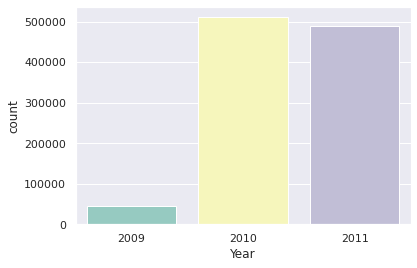

In [ ]:
# Visualisasi "Revenue" tiap tahun

print("Jumlah 'Revenue' tiap tahun: \n", revenue_every_year)
print("Rata-rata Revenue dalam 3 tahun (2009-2011) adalah",revenue_per_year)
revenuex = sns.countplot(data=sales, x="Year", palette="Set3")

Berdasarkan grafik di atas, dapat dilihat bahwa revenue pada tahun 2009 ke tahun 2010 meningkat pesat dan pada tahun 2010 ke tahun 2011 sedikit menurun dan rata-rata revenue dalam 3 tahun tersebut adalah 348140.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished = sales[sales["Customer ID"].notnull()]

#### Customers who canceled their purchases

In [ ]:
cancel = ritel[ritel["Invoice"].str.contains("C")]

### Number of Finished and Canceled Transactions Each Year

Jumlah transaksi berhasil tiap tahun: 
 Year
2009     30761
2010    403094
2011    371765
Name: Invoice, dtype: int64


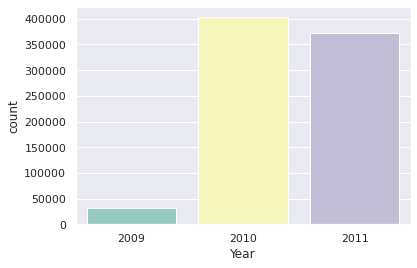

In [ ]:
# Menghitung transaksi berhasil per tahun

success_per_year = finished.groupby("Year")["Invoice"].count()
print("Jumlah transaksi berhasil tiap tahun: \n", success_per_year)
susceesplot = sns.countplot(data=finished, x="Year", palette="Set3")

Jumlah transaksi gagal tiap tahun: 
 Year
2009    1015
2010    9919
2011    8560
Name: Invoice, dtype: int64


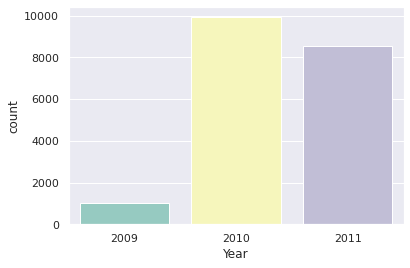

In [ ]:
# Menghitung transaksi gagal per tahun

failed_per_year = cancel.groupby("Year")["Invoice"].count()
print("Jumlah transaksi gagal tiap tahun: \n", failed_per_year)
cancelledplot = sns.countplot(data=cancel, x="Year", palette="Set3")

### Cancellation Rate

In [ ]:
data = ritel.groupby("Year")["Invoice"]
for year,value in data:
    orders = value
    cancelled = value[value.str.contains("C")]
    print("Cancellation Rate pada tahun",year,"adalah", round(cancelled.count()/orders.count(),8)*100,"%")

Cancellation Rate pada tahun 2009 adalah 2.244185 %
Cancellation Rate pada tahun 2010 adalah 1.897596 %
Cancellation Rate pada tahun 2011 adalah 1.713957 %


### Interpretation

Berdasarkan data jumlah transaksi berhasil dan transaksi dibatalkan yang ditampilkan pada grafik di atas, diperoleh bahwa jumlah transaksi naik secara signifikan pada tahun 2009 ke 2010 dan pada tahun 2010 ke 2011 jumlah transaksi sedikit menurun. Jumlah transaksi berhasil dan dibatalkan berdasarkan jumlah memang terlihat naik, namun berdasarkan persentase tiap tahunnya terlihat bahwa Cancellation Rate menurun dari tahun ke tahun.